In [23]:
from matplotlib.pyplot import imshow
from scipy.fft import fft,dct,idct
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

Text(0.5, 1.0, 'The first example')

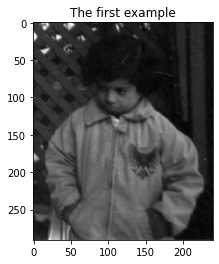

In [24]:
Original_image1 = plt.imread("1.tif")
plt.imshow(Original_image1,cmap="gray")
plt.axis("on")
plt.title("The first example")

Text(0.5, 1.0, 'The second example')

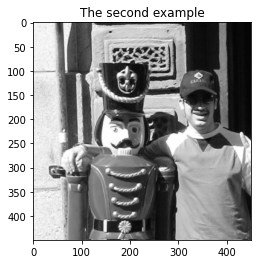

In [25]:
Original_image2 = plt.imread("2.tif")
plt.imshow(Original_image2,cmap="gray")
plt.axis("on")
plt.title("The second example")

In [26]:
def hist_median_calculator(histogram,n,size_of_image) :
  cd = 0 
  median = 0 
  for index,value in enumerate(histogram) : 
    cd += value
    if cd > (size_of_image/2) : 
      median = index 
      break 
  out =list([median])
  if n > 0 : 
    back_list = hist_median_calculator(histogram[:median],n-1,cd)
    front_list = hist_median_calculator(histogram[median:],n-1 ,size_of_image - cd)
    new_front_list = list(map(lambda x : x + median , front_list))
    back_list.append(median)
    back_list.extend(new_front_list)
    out = back_list.copy()
  return out 

In [27]:
def hist_median(image, n,plthisto=True) : 
  size_of_image = image.shape[0]*image.shape[1]
  flat = image.flatten()
  histogram = np.zeros((256,))
  pixels = np.array(range(256))
  for pixel in flat : 
    histogram[pixel] += 1
  out = hist_median_calculator(histogram,n-1,size_of_image)
  mylist = [0]
  mylist.extend(out)
  mylist.append(256)
  result = np.zeros(flat.shape)
  for i,value_i in enumerate(flat) : 
    for j,value_j in enumerate(mylist) : 
      if j==0 : 
        continue
      if value_i<value_j : 
        result[i] = int((mylist[j]+mylist[j-1])/2)
        break 
  result = np.reshape(result,image.shape)
  if plthisto :
      plt.bar(pixels,histogram)
      for i in out : 
        plt.axvline(i,0,1,c='y')
      plt.show()
  return result

In [28]:
def simple_quantization(image) : 
  flat = image.flatten()
  for i,value in enumerate(flat) :
    flat[i] = (int(value/64))*64
  result = np.reshape(flat,image.shape)
  return result

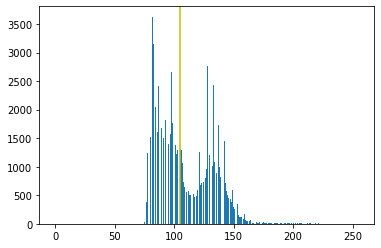

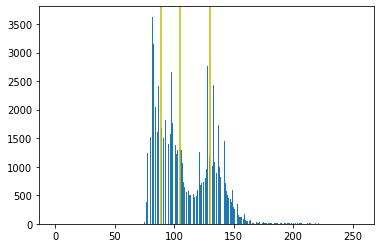

Text(0.5, 1.0, 'An image after median cut equalization with n = 2')

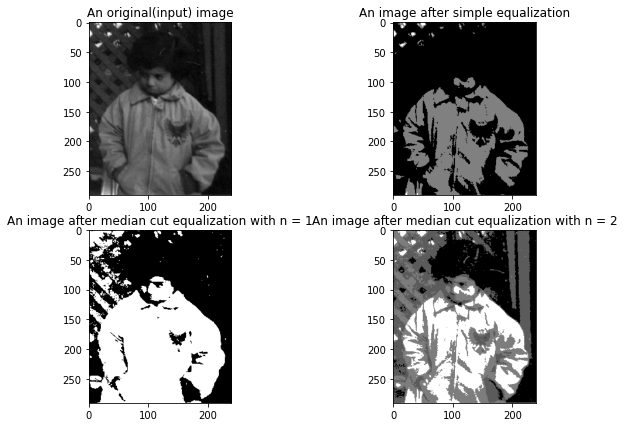

In [52]:
simple_quantization_test1 = simple_quantization(Original_image1)

median_cut_quantization_test1_1 = hist_median(Original_image1,1)

median_cut_quantization_test1_2 = hist_median(Original_image1,2)

#median_cut_quantization_test1_3 = hist_median(Original_image1,3)

#median_cut_quantization_test1_4 = hist_median(Original_image1,5)

#median_cut_quantization_test1_5 = hist_median(Original_image1,8)

fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

#Show an original(input) image
fig.add_subplot(rows,columns,1)
plt.imshow(Original_image1,cmap='gray')
plt.axis("on")
plt.title("An original(input) image")

#Show an image after simple quantization
fig.add_subplot(rows, columns, 2)
plt.imshow(simple_quantization_test1,cmap='gray')
plt.axis("on")
plt.title("An image after simple equalization")


#Show an image after median cut equalization with n=1
fig.add_subplot(rows,columns,3)
plt.imshow(median_cut_quantization_test1_1,cmap='gray')
plt.axis("on")
plt.title("An image after median cut equalization with n = 1")


#Show an image after median cut equalization with n=2
fig.add_subplot(rows,columns,4)
plt.imshow(median_cut_quantization_test1_2,cmap='gray')
plt.axis("on")
plt.title("An image after median cut equalization with n = 2")

#Show an image after median cut equalization with n=3
# fig.add_subplot(rows,columns,4)
# plt.imshow(median_cut_quantization_test1_3,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 3")

#Show an image after median cut equalization with n=5
# fig.add_subplot(rows,columns,4)
# plt.imshow(median_cut_quantization_test1_4,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 5")

#Show an image after median cut equalization with n=8
# fig.add_subplot(rows,columns,4)
# plt.imshow(median_cut_quantization_test1_5,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 8")


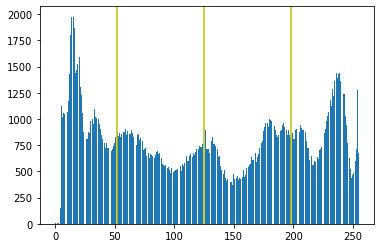

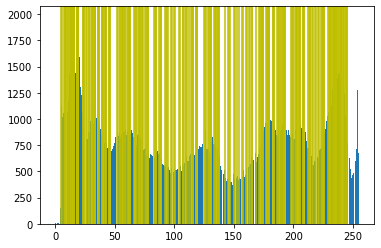

Text(0.5, 1.0, 'An image after median cut equalization with n = 8')

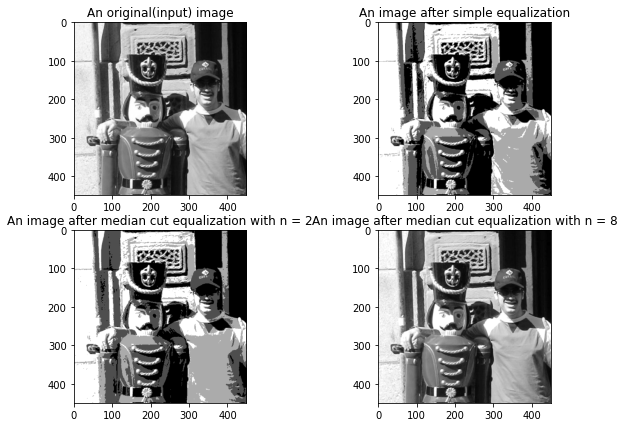

In [54]:
simple_quantization_test2 = simple_quantization(Original_image2)

median_cut_quantization_test2_1 = hist_median(Original_image2,1)

#median_cut_quantization_test2_2 = hist_median(Original_image2,2)

#median_cut_quantization_test2_3 = hist_median(Original_image2,3)

#median_cut_quantization_test2_4 = hist_median(Original_image2,5)

#median_cut_quantization_test2_5 = hist_median(Original_image2,8)

fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

#Show an original(input) image
fig.add_subplot(rows,columns,1)
plt.imshow(Original_image2,cmap='gray')
plt.axis("on")
plt.title("An original(input) image")

#Show an image after simple quantization
fig.add_subplot(rows, columns, 2)
plt.imshow(simple_quantization_test2,cmap='gray')
plt.axis("on")
plt.title("An image after simple equalization")

#Show an image after median cut equalization with n=1
fig.add_subplot(rows,columns,3)
plt.imshow(median_cut_quantization_test2_1,cmap='gray')
plt.axis("on")
plt.title("An image after median cut equalization with n = 1")

#Show an image after median cut equalization with n=2
# fig.add_subplot(rows,columns,3)
# plt.imshow(median_cut_quantization_test2_2,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 2")

#Show an image after median cut equalization with n=3
# fig.add_subplot(rows,columns,4)
# plt.imshow(median_cut_quantization_test2_3,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 3")

#Show an image after median cut equalization with n=5
# fig.add_subplot(rows,columns,4)
# plt.imshow(median_cut_quantization_test2_4,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 5")

# Show an image after median cut equalization with n=8
# fig.add_subplot(rows,columns,4)
# plt.imshow(median_cut_quantization_test2_5,cmap='gray')
# plt.axis("on")
# plt.title("An image after median cut equalization with n = 8")


In [31]:
def PSNR(Original,comperresed) : 
  MSE = np.mean((Original-comperresed)**2)
  if MSE == 0 : 
    return 100 
  pixel_max = 255.0
  PSNR = 20 * math.log10(pixel_max/math.sqrt(MSE))
  return PSNR 

In [32]:
def HW3_dct(I,K,t) : 
  height , width = I.shape 
  height_padding = 0
  width_padding = 0 
  if height % K :
    height_padding = K - (height%K) 
    width_padding = K - (width % K)
  Padding_I = np.zeros((height+height_padding,width+width_padding))
  I_dct_forward = np.zeros(Padding_I.shape)
  I_dct_backward = np.zeros(Padding_I.shape)
  remainder_of_height = height_padding % 2 
  remainder_of_width = width_padding % 2 
  Padding = ((int((height_padding + remainder_of_height)/2),int((height_padding-remainder_of_height)/2)),(int((width_padding + remainder_of_width)/2),int((width_padding-remainder_of_width)/2)))
  Padding_I = np.pad(I,Padding,'constant',constant_values = 0)

  height_of_start = 0 
  width_of_start = 0 

  for height_of_start in range(0,Padding_I.shape[0],K) : 
    for width_of_start in range(0,Padding_I.shape[1],K) : 
      I_dct_forward[height_of_start:height_of_start+K, width_of_start:width_of_start+K] = \
      dct(Padding_I[height_of_start:height_of_start+K, width_of_start:width_of_start+K])

  I_dct_forward[np.abs(I_dct_forward)<t] = 0

  height_of_start = 0 
  width_of_start = 0 

  for height_of_start in range(0,Padding_I.shape[0],K) : 
    for width_of_start in range(0,Padding_I.shape[1],K) : 
      I_dct_backward[height_of_start:height_of_start+K,width_of_start:width_of_start+K] = \
      idct(I_dct_forward[height_of_start:height_of_start+K,width_of_start:width_of_start+K])
  fig = plt.figure(figsize=(10, 7))
  rows = 2
  columns = 2

  #Show original(input) image
  fig.add_subplot(rows, columns, 1)
  plt.imshow(Padding_I,cmap='gray')
  plt.axis("on")
  plt.title("An original(input) image:")

  #Show an padded image
  fig.add_subplot(rows, columns, 2)
  plt.imshow(Padding_I,cmap='gray')
  plt.axis("on")
  plt.title("Padded image:")

  #Show an  image dct backward image
  fig.add_subplot(rows, columns, 3)
  plt.imshow(I_dct_backward,cmap='gray')
  plt.axis("on")
  plt.title("DCT backwarded image:")

  psnr = PSNR(Padding_I,I_dct_backward)

  print("PSNR is:",psnr)
  I_subtracted = np.abs(np.subtract(Padding_I,I_dct_backward))

  #Show an image that produce with subtration of padded image and dct backward image
  fig.add_subplot(rows, columns, 4)
  plt.imshow(I_subtracted,cmap='gray')
  plt.axis("on")
  plt.title("Subtracted image:")

  number_of_zeros = np.count_nonzero(I_dct_forward==0)
  percent_of_zeros = (number_of_zeros/(I_dct_forward.shape[0]*I_dct_forward.shape[1]))*100
  print("Number of zereos are:",number_of_zeros)
  print("Percentage of zeros is:",percent_of_zeros)


PSNR is: 39.10306426809288
Number of zereos are: 58688
Percentage of zeros is: 79.94768962510898


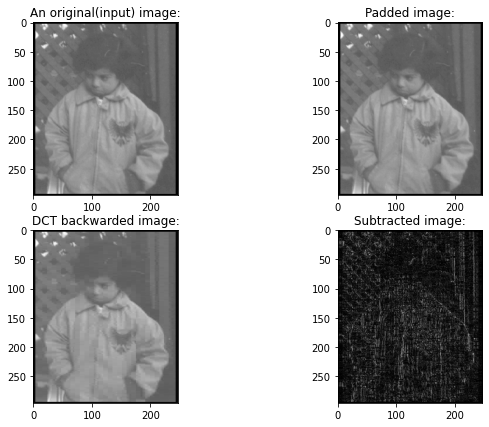

In [33]:
HW3_dct(Original_image1,K=8,t=50)

PSNR is: 34.68057431594515
Number of zereos are: 61734
Percentage of zeros is: 84.09710113339146


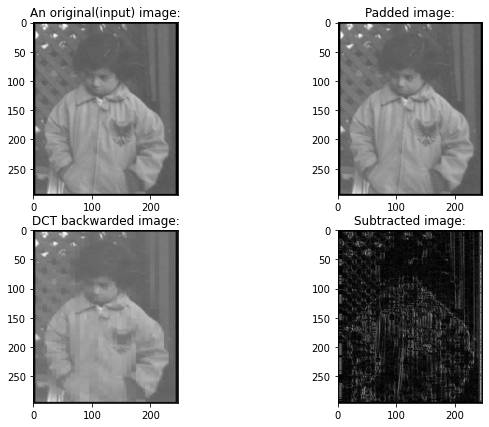

In [34]:
HW3_dct(Original_image1,K=8,t=100)

PSNR is: 32.267462895938365
Number of zereos are: 63035
Percentage of zeros is: 85.86938753269399


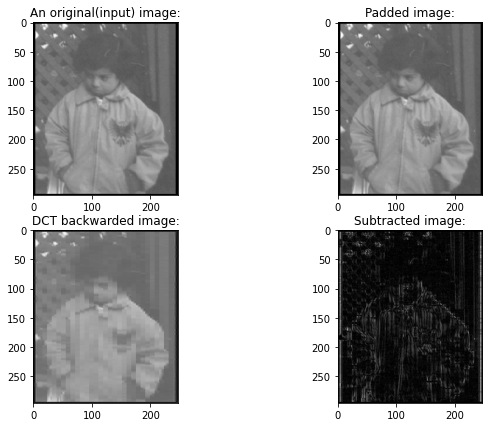

In [35]:
HW3_dct(Original_image1,K=8,t=150)

PSNR is: 40.60333976408906
Number of zereos are: 58676
Percentage of zeros is: 75.19671921056003


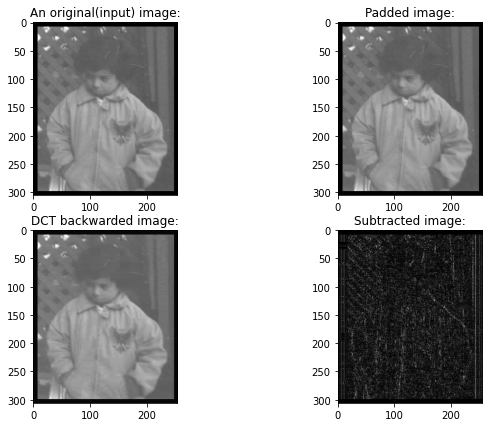

In [36]:
HW3_dct(Original_image1,K=17,t=50)

PSNR is: 34.51148900381664
Number of zereos are: 66519
Percentage of zeros is: 85.2479815455594


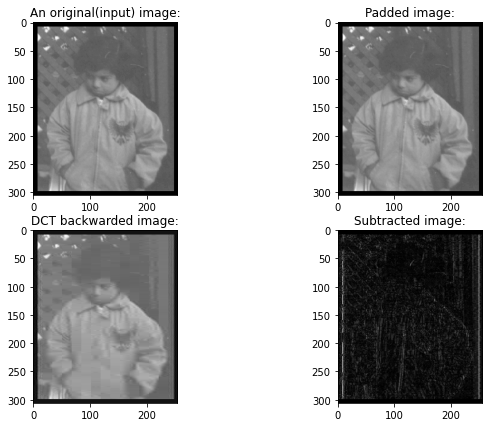

In [37]:
HW3_dct(Original_image1,K=17,t=100)

PSNR is: 32.221735601416476
Number of zereos are: 69508
Percentage of zeros is: 89.07855952838652


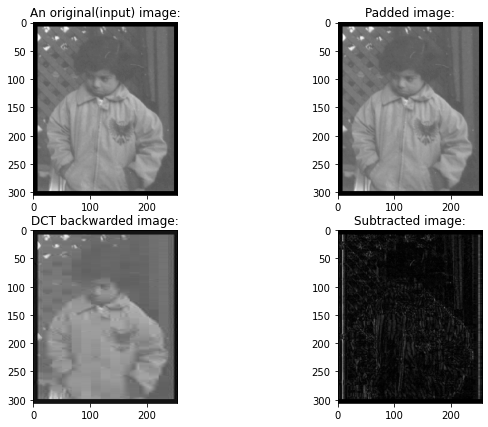

In [38]:
HW3_dct(Original_image1,K=17,t=150)

PSNR is: 93.77062357641165
Number of zereos are: 44871
Percentage of zeros is: 28.044375


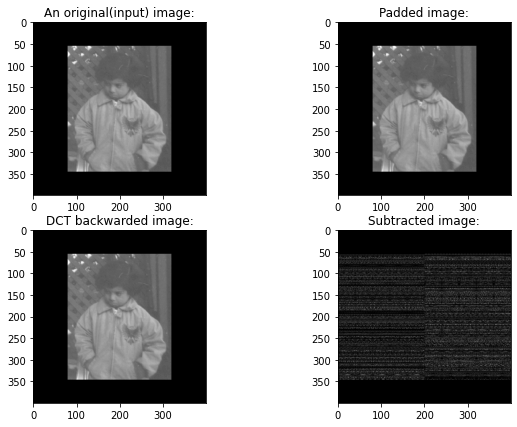

In [67]:
HW3_dct(Original_image1,K=200,t=2)

PSNR is: 37.13880171658717
Number of zereos are: 145433
Percentage of zeros is: 69.94123191751308


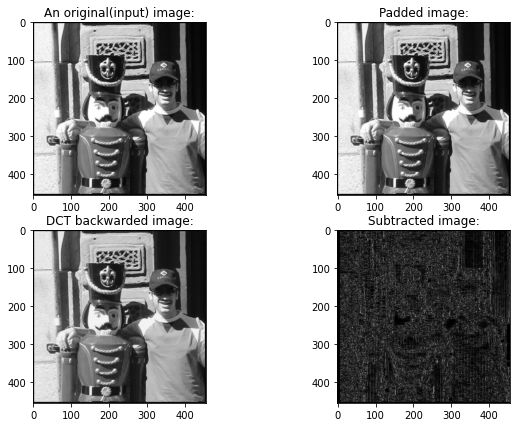

In [39]:
HW3_dct(Original_image2,K=8,t=50)

PSNR is: 32.445942324970176
Number of zereos are: 161234
Percentage of zeros is: 77.54020467836257


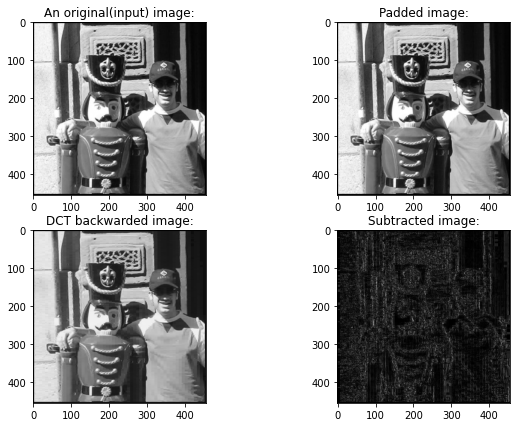

In [40]:
HW3_dct(Original_image2,K=8,t=100)

PSNR is: 29.726924613493804
Number of zereos are: 168561
Percentage of zeros is: 81.06388504155125


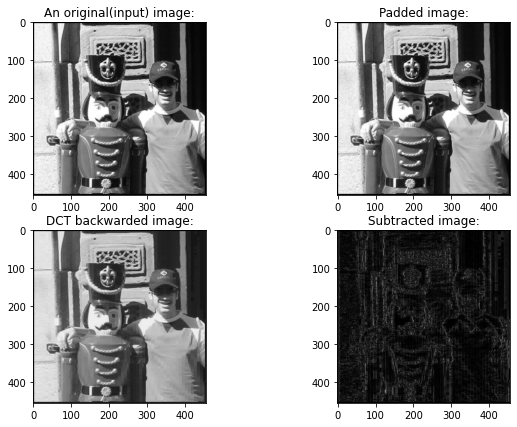

In [41]:
HW3_dct(Original_image2,K=8,t=150)

PSNR is: 39.75367810130433
Number of zereos are: 132192
Percentage of zeros is: 62.745098039215684


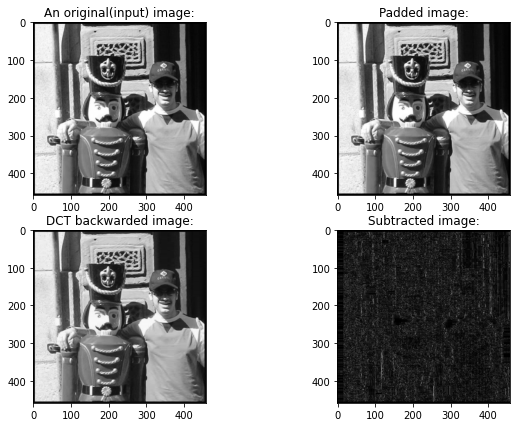

In [42]:
HW3_dct(Original_image2,K=17,t=50)

PSNR is: 34.11845729923608
Number of zereos are: 156956
Percentage of zeros is: 74.49936159406876


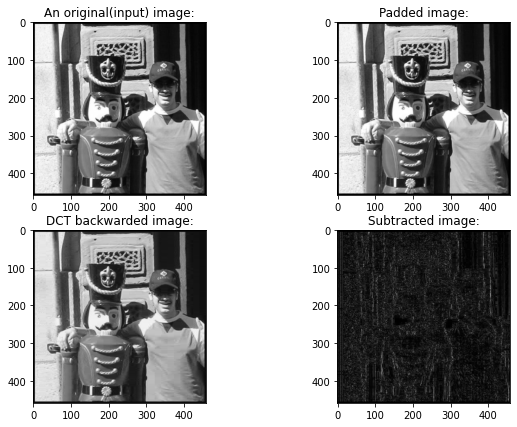

In [43]:
HW3_dct(Original_image2,K=17,t=100)

PSNR is: 31.22484084293258
Number of zereos are: 168200
Percentage of zeros is: 79.83634024900205


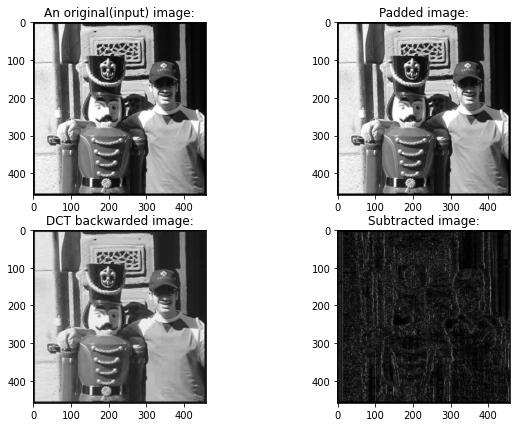

In [44]:
HW3_dct(Original_image2,K=17,t=150)

PSNR is: 82.06773403705031
Number of zereos are: 4516
Percentage of zeros is: 2.230123456790124


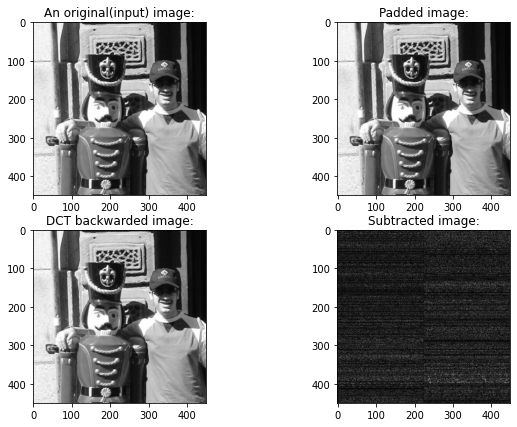

In [63]:
HW3_dct(Original_image2,K=225,t=5)